# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import the data set
stock = pd.read_csv('/content/drive/MyDrive/DSBA Certificate/Unsupervised Learning/stock_data.csv')

## Data Overview

- Observations
- Sanity checks

In [ ]:
stock.shape

(340, 15)

There are 340 rows and 15 columns in the data

In [ ]:
stock.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

In [ ]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [ ]:
stock.describe(include='all').T

count unique  \
Ticker Symbol                   340    340   
Security                        340    340   
GICS Sector                     340     11   
GICS Sub Industry               340    104   
Current Price                 340.0    NaN   
Price Change                  340.0    NaN   
Volatility                    340.0    NaN   
ROE                           340.0    NaN   
Cash Ratio                    340.0    NaN   
Net Cash Flow                 340.0    NaN   
Net Income                    340.0    NaN   
Earnings Per Share            340.0    NaN   
Estimated Shares Outstanding  340.0    NaN   
P/E Ratio                     340.0    NaN   
P/B Ratio                     340.0    NaN   

                                                             top freq  \
Ticker Symbol                                                AAL    1   
Security                                 American Airlines Group    1   
GICS Sector                                          Industrials   53   
GICS Sub Industry             Oil & Gas Exploration & Production   16   
Current Price                                                NaN  NaN   
Price Change                                                 NaN  NaN   
Volatility                                                   NaN  NaN   
ROE                                                          NaN  NaN   
Cash Ratio                                                   NaN  NaN   
Net Cash Flow                                                NaN  NaN   
Net Income                                                   NaN  NaN   
Earnings Per Share                                           NaN  NaN   
Estimated Shares Outstanding                                 NaN  NaN   
P/E Ratio                                                    NaN  NaN   
P/B Ratio                                                    NaN  NaN   

                                           mean                std  \
Ticker Symbol                               NaN                NaN   
Security                                    NaN                NaN   
GICS Sector                                 NaN                NaN   
GICS Sub Industry                           NaN                NaN   
Current Price                         80.862345          98.055086   
Price Change                           4.078194          12.006338   
Volatility                             1.525976           0.591798   
ROE                                   39.597059          96.547538   
Cash Ratio                            70.023529          90.421331   
Net Cash Flow                   55537620.588235  1946365312.175789   
Net Income                    1494384602.941176  3940150279.327936   
Earnings Per Share                     2.776662           6.587779   
Estimated Shares Outstanding    577028337.75403   845849595.417695   
P/E Ratio                             32.612563          44.348731   
P/B Ratio                             -1.718249          13.966912   

                                        min          25%          50%  \
Ticker Symbol                           NaN          NaN          NaN   
Security                                NaN          NaN          NaN   
GICS Sector                             NaN          NaN          NaN   
GICS Sub Industry                       NaN          NaN          NaN   
Current Price                           4.5       38.555       59.705   
Price Change                     -47.129693    -0.939484     4.819505   
Volatility                         0.733163     1.134878     1.385593   
ROE                                     1.0         9.75         15.0   
Cash Ratio                              0.0         18.0         47.0   
Net Cash Flow                -11208000000.0 -193906500.0    2098000.0   
Net Income                   -23528000000.0  352301250.0  707336000.0   
Earnings Per Share                    -61.2       1.5575        2.895   
Estimated Shares Outstanding    27672156.86  158848216

- Ticker Symbol and Company are all unique entries (340). There are 11 unique entires for GICS Sector and 104 unique entries for GICS Sub Industry.
- The most common GICS Sector is 'Industrials.' The most common GICS Sub Industry is 'Oil & Gas Exploration & Production.'

In [ ]:
#check for missing data
stock.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

There are no missing entries in the data set.

In [ ]:
#check for duplicates
stock.duplicated().sum()

0

There are no duplicated entries in the dataset!

In [ ]:
#copy the data
data = stock.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [ ]:
#apply shared codes for created plots to visualize data

# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Univariate Analysis

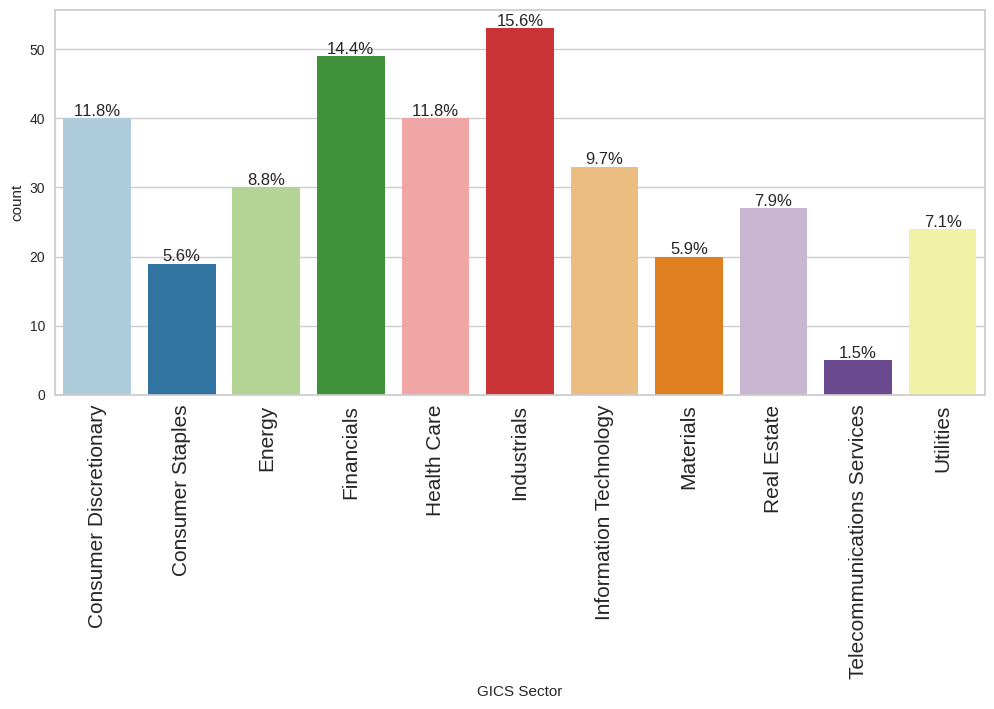

In [ ]:
labeled_barplot(data, 'GICS Sector', perc=True)

The top economic sectors are Industrials (15.6%), Financials (14.4%), and Healthcare/Consumer Discreationary (both 11.8%). These sectors make up approx. 53.6% of the dataset. The least common sector is Telecommunications Services (1.5% of data).

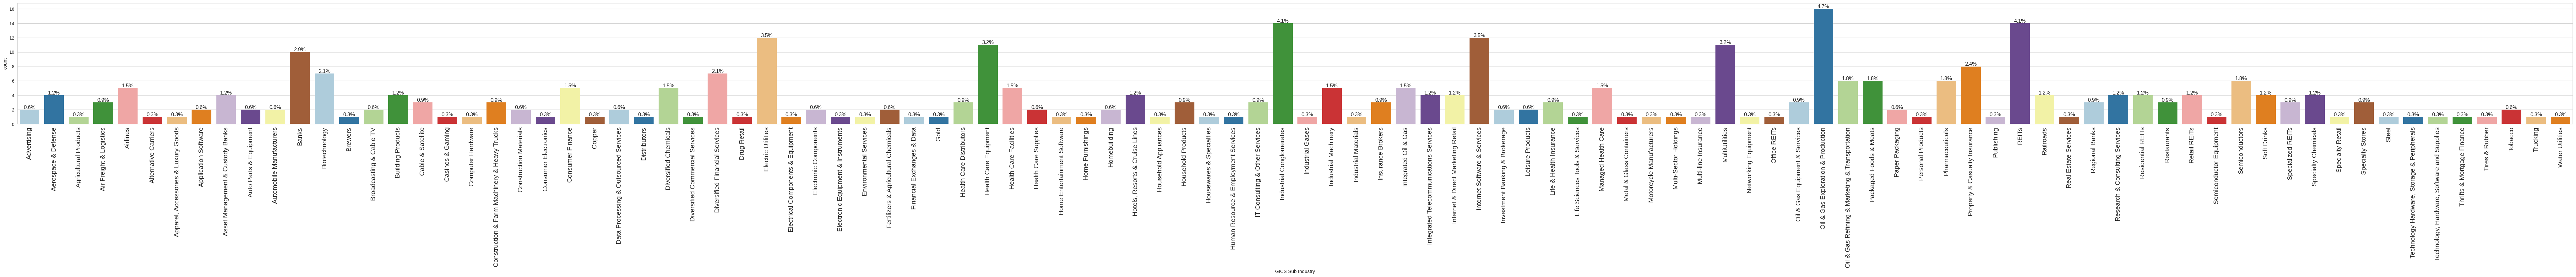

In [ ]:
labeled_barplot(data, 'GICS Sub Industry', perc=True)

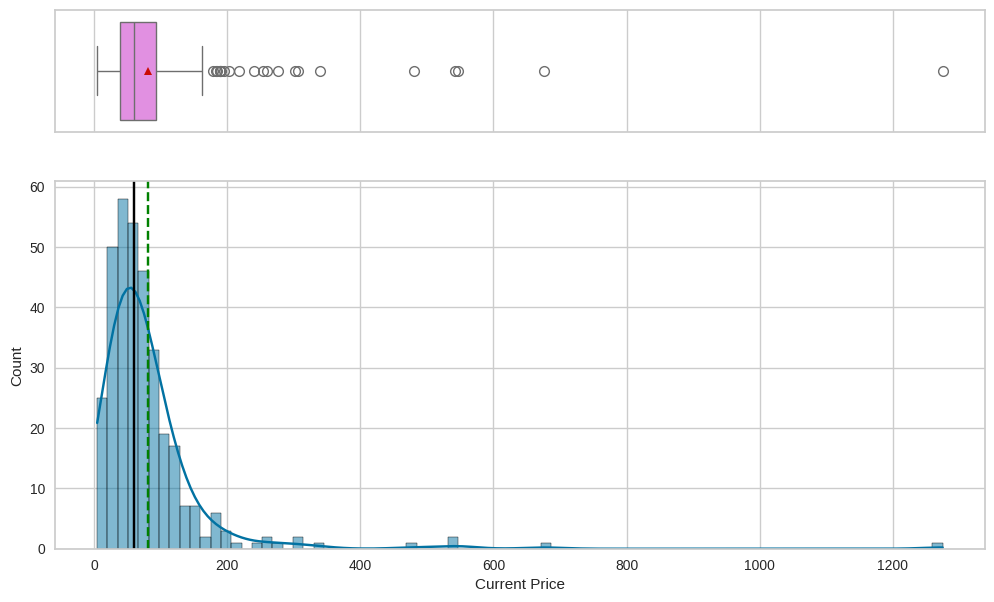

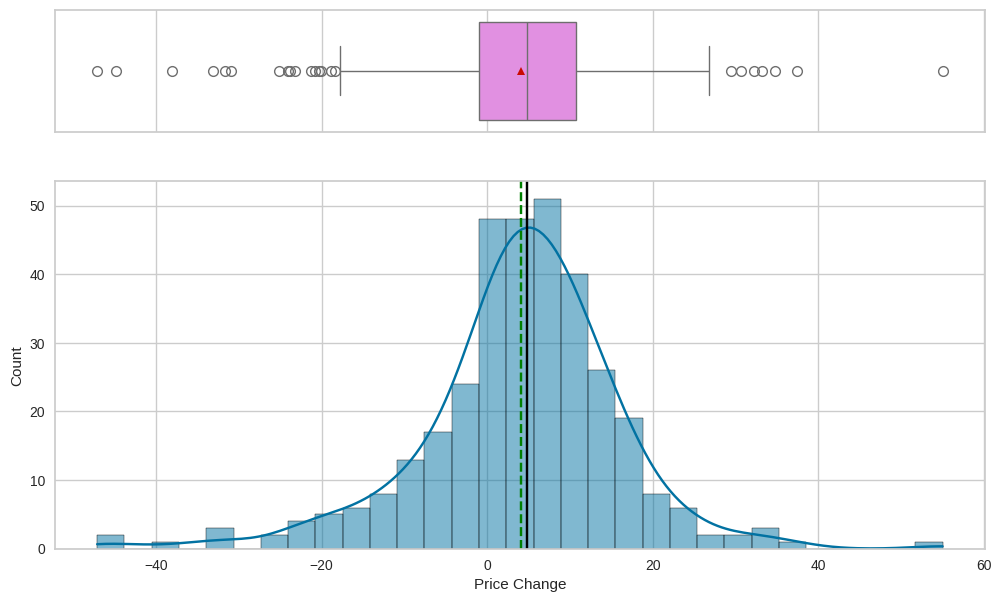

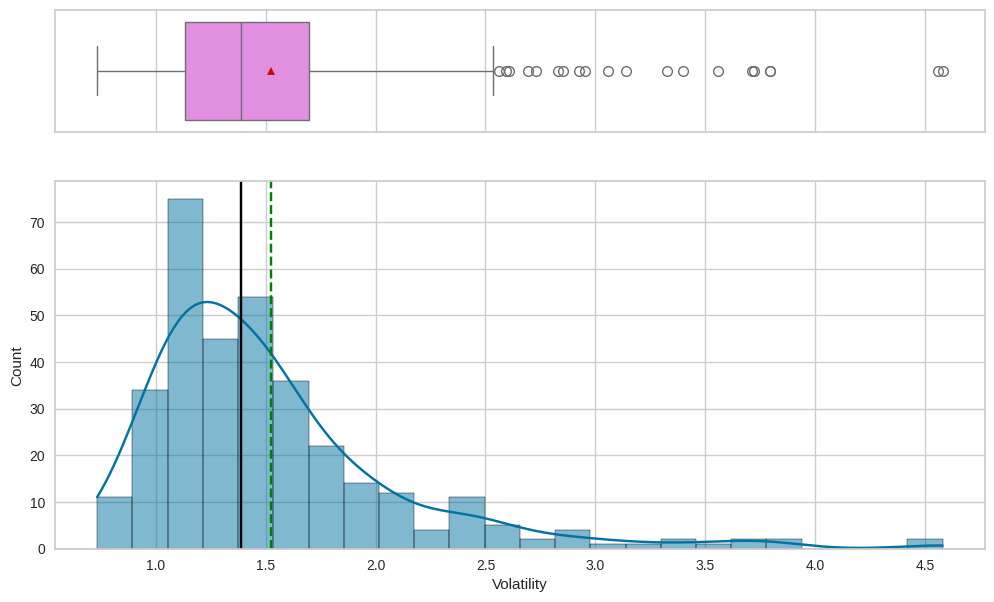

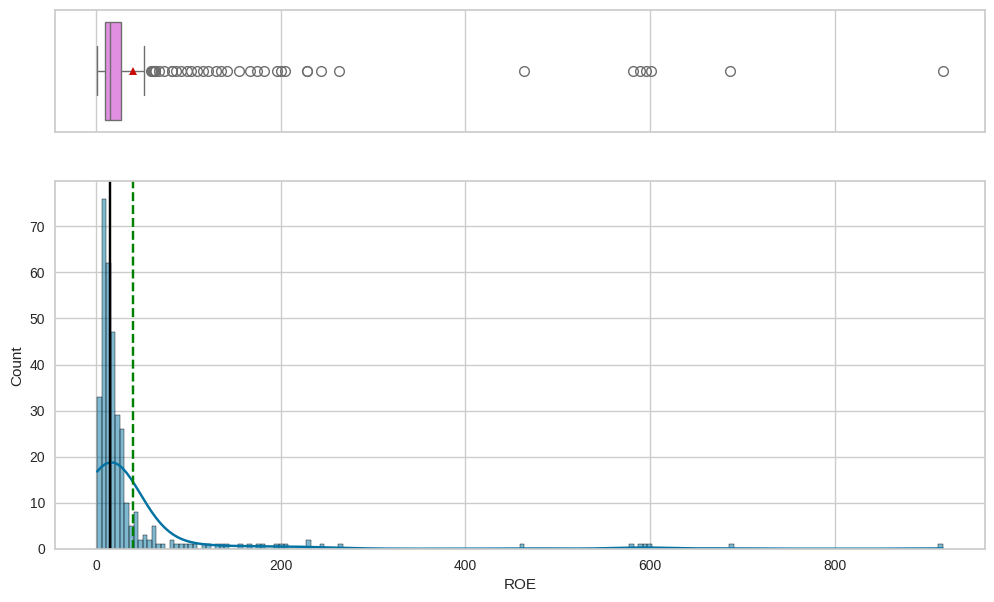

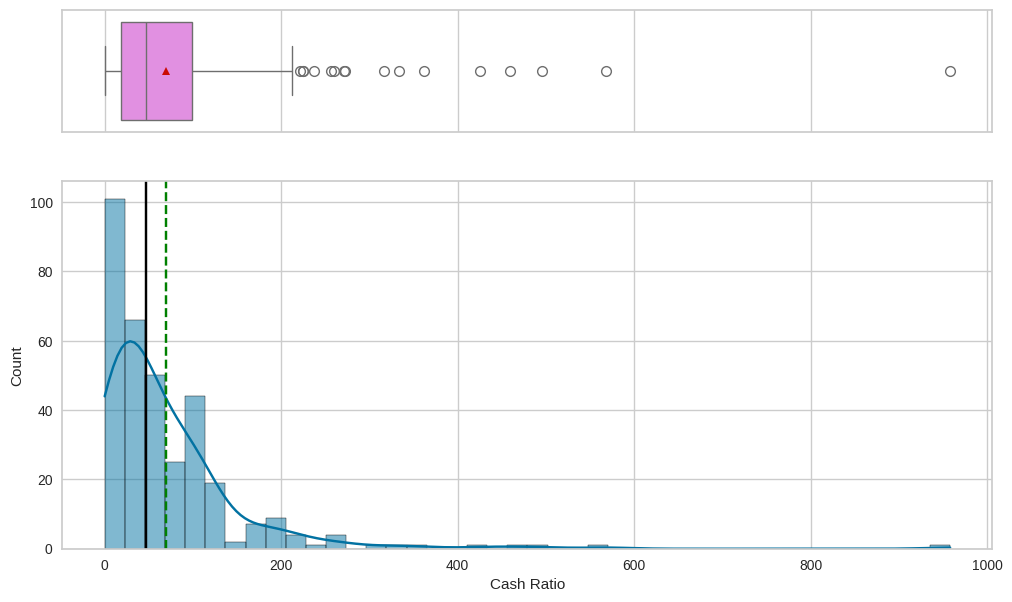

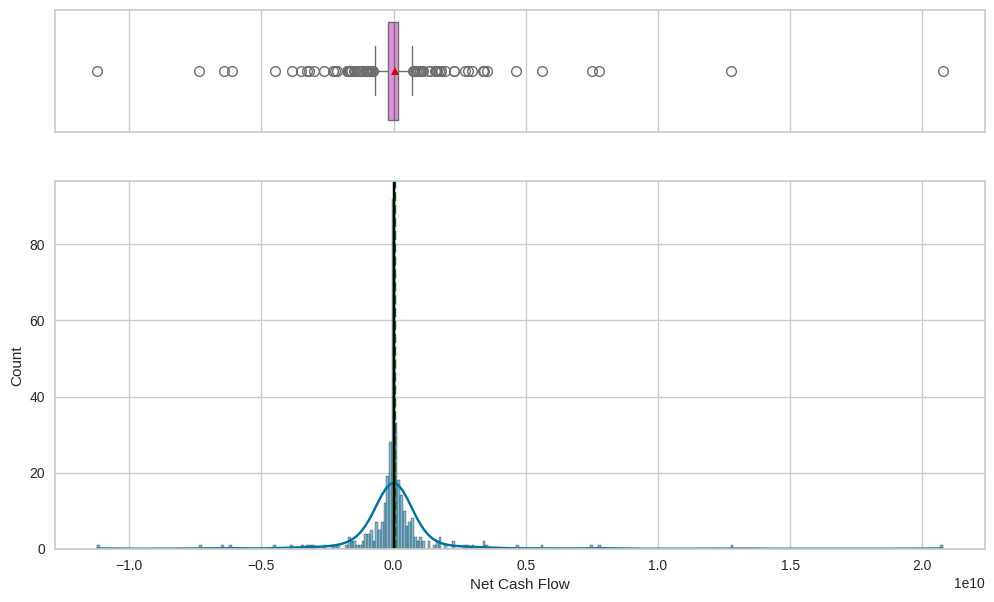

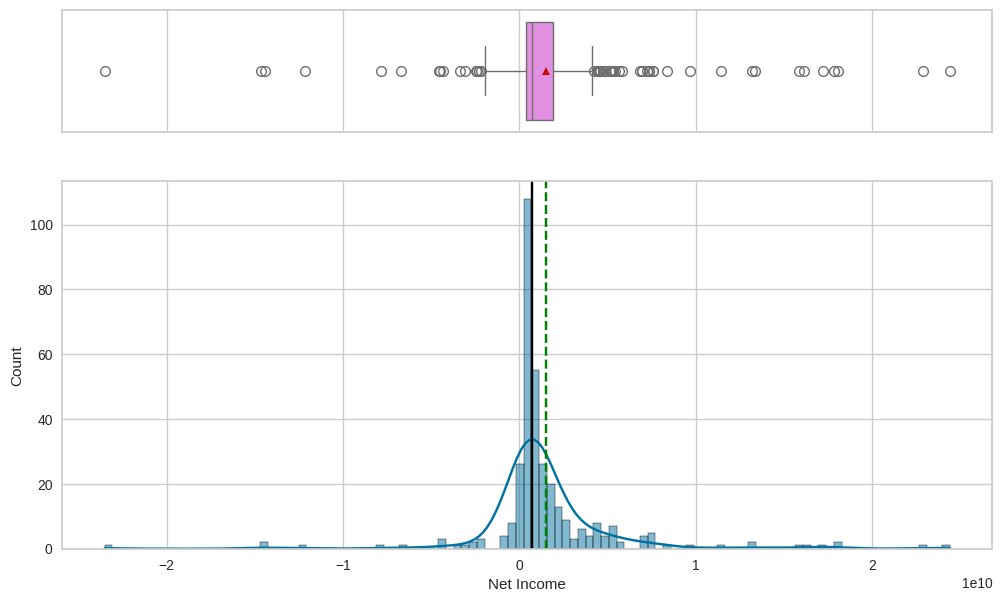

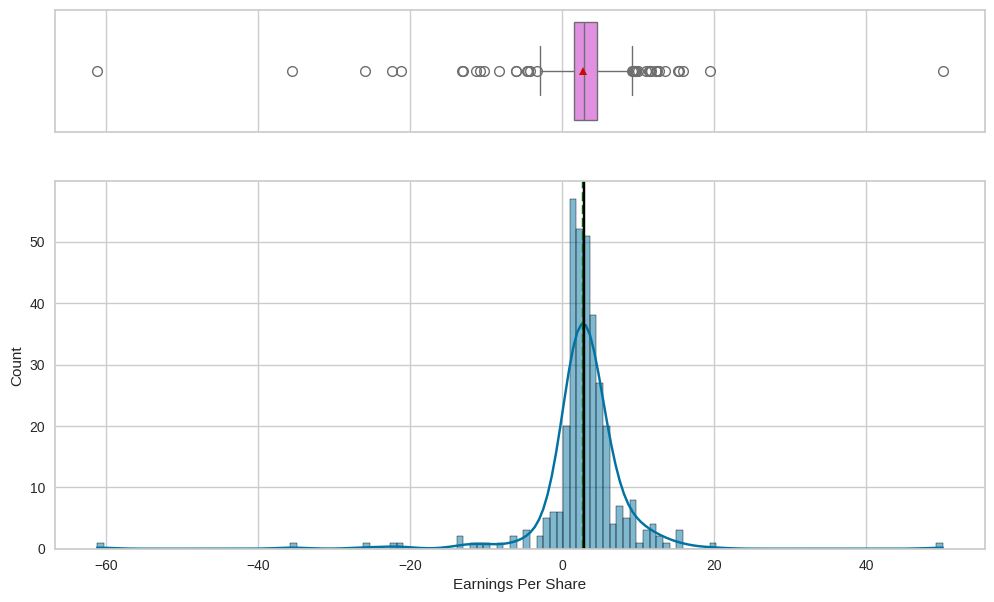

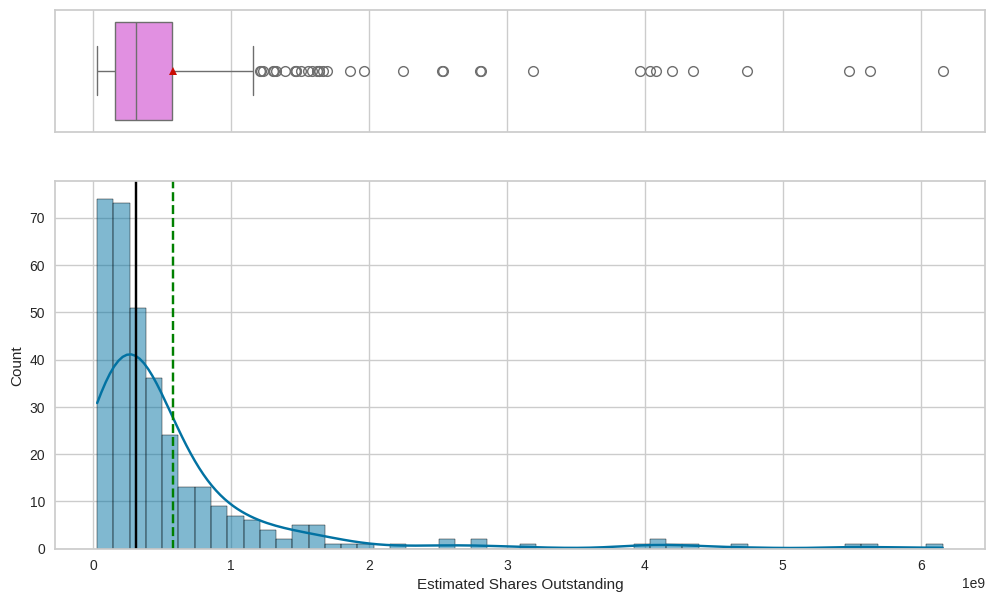

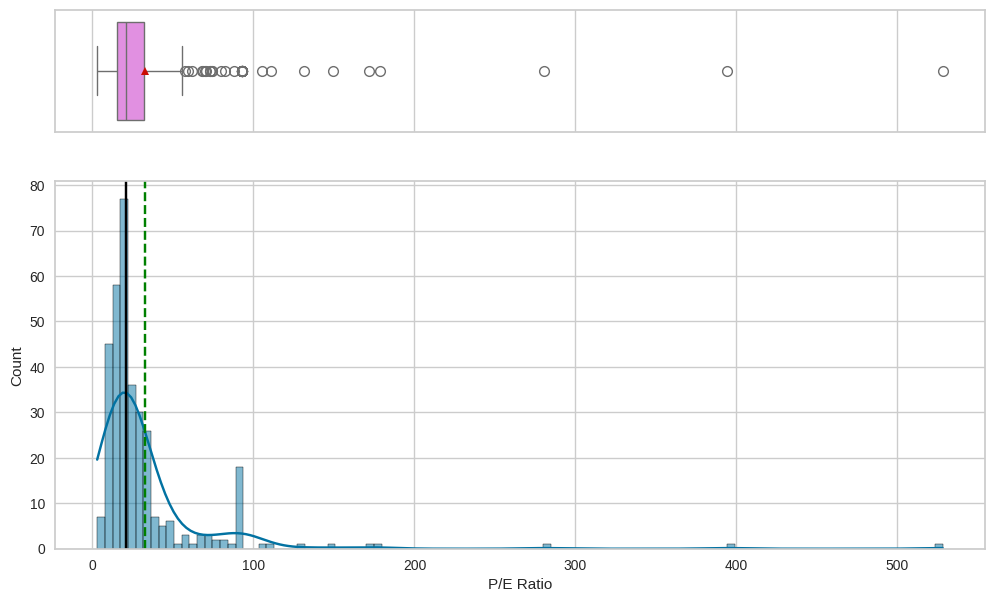

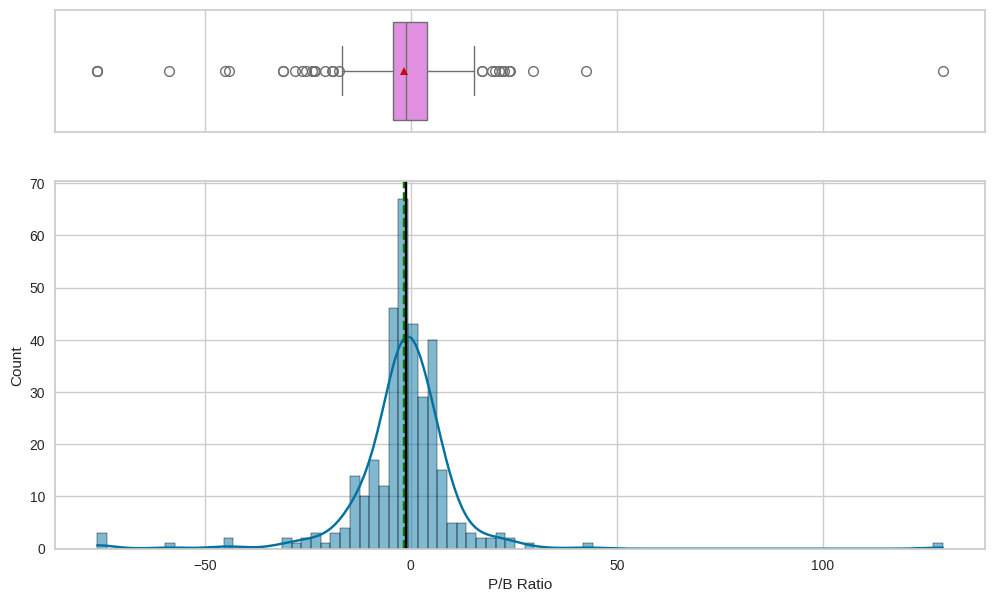

In [ ]:
# understand distributions of numerical columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()

for x in num_cols:
    histogram_boxplot(data, x)

- The following columns are skewed right when plotted with histograms/boxplots: Current Price, Volatility, ROE, Cash Ratio, Estimated Shares Outstanding, P/E Ratio. There are outliers of large values present for these variables.
- The following columns display an (approximately) normal distribution when plotted with histograms/boxplots: Price Change, Net Cash Flow, Net Income, Earnings Per Share, P/B Ratio.
- **Response to Question#1:** The distribution of stock prices (attribute 'Current Price') is right skewed. The measures of center are in the range of $60-$80. The range of current stock prices is from a minimum of 4.5 dollars to a maximum of 1,274 dollars. 75% of the data shows stock prices less than $93.

### Bivariate Analysis

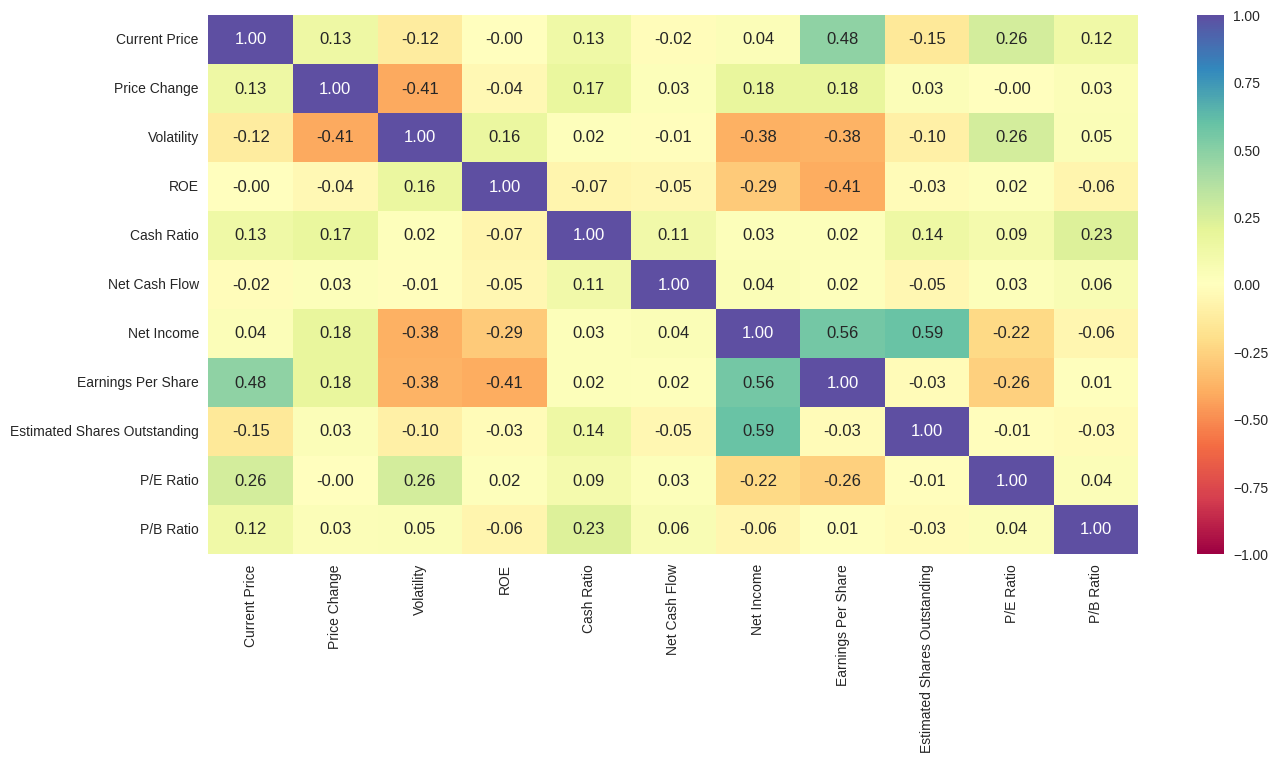

In [ ]:
#heatmap to see correlation amongst numeric variables
plt.figure(figsize=(15, 7))
sns.heatmap(
    data[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Strong Positive Correlation:
- As Net Incomes increases, so does Estimated Shares Outstanding
- As Net Incomes increases, so does Earnings Per Share
- As Current Price Increases, so does Earnings Per Share

Strong Negative Correlations:
- As ROE decreases, Earnings Per Share increases
- As Price Change decreases, Volatility increases
- As Volatility decreases, Earnings Per Share and Net Income increase.

There are no variables with  correlation more than 0.70 / less than -0.70. We will not drop any correlated variables to change dimensionality.

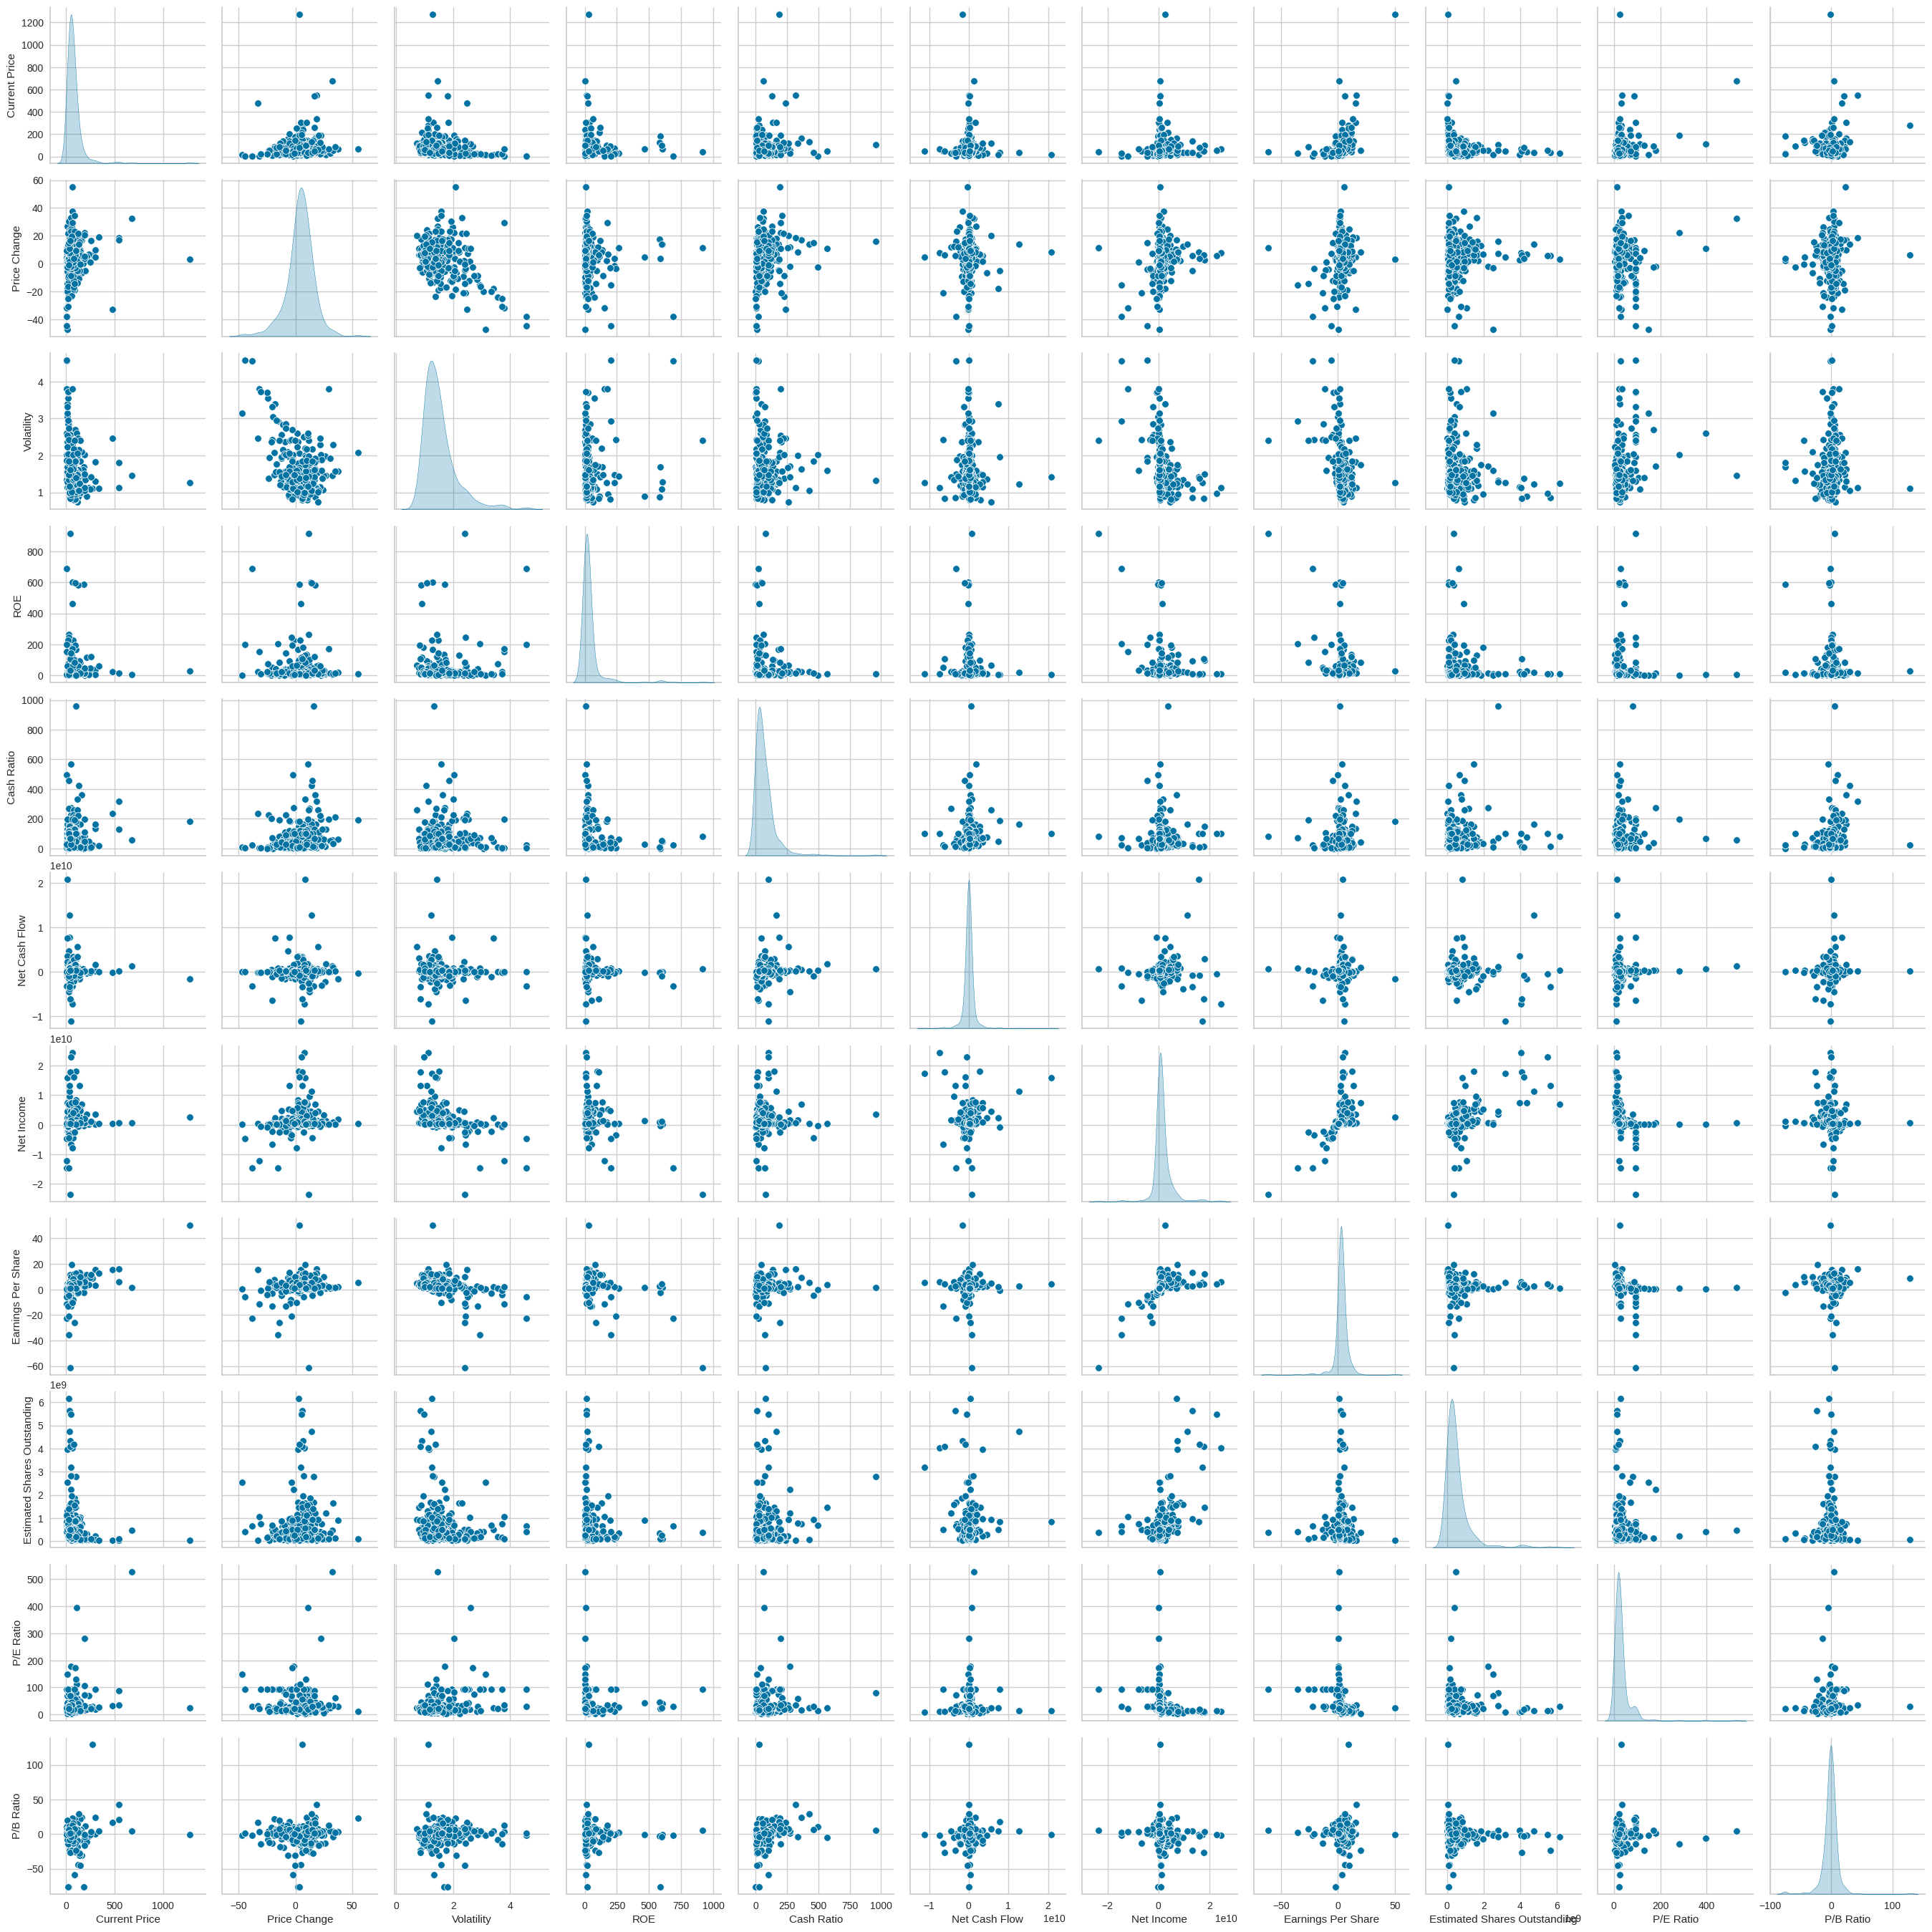

In [ ]:
sns.pairplot(data[num_cols], diag_kind='kde')
plt.show()

Checking the peaks of the KDE plots of different variables, we may expect to apply 3-4 clusters when working with K-Means Clustering.

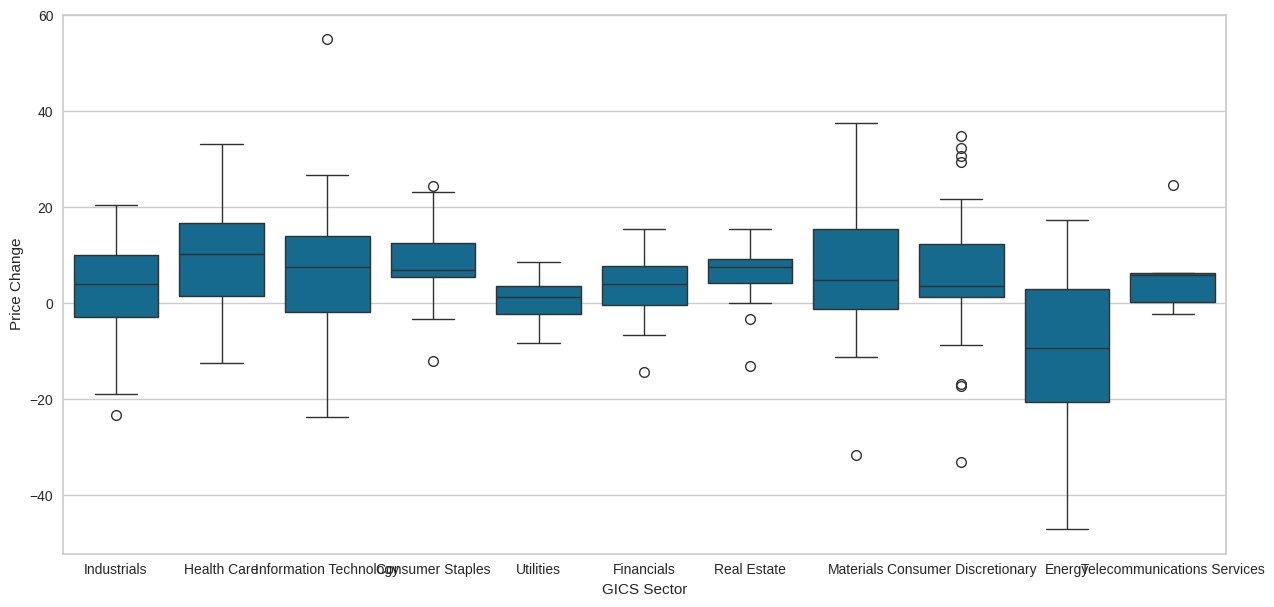

In [ ]:
#question 2
#compare GICS Sector and Price Change
plt.figure(figsize=(15, 7))
sns.boxplot(x=data["GICS Sector"], y=data['Price Change'])
plt.show()

**Response to Question 2:**
- Which Stock Economic Sectors have seen max price increases?
- The Health industry has the largest median of all industries. This shows that 50% of the Health Industry stcok data experiences larger price increases than other industries. More than 75% of the Health industry stock price changes are positive/increases. Following close behind are Information Technology, Real Estate, and Telecommunications Services.
- The Industries with the lowest variability (this shows stability in stock price changes) are Telecommunication Services (75% of price changes are 0 or larger); the Real Estate Industry experiences positive price changes in stocks except for a few outlier events.
- The Energy Industry has a high variety in price changes, where greater than 50% of the stock price changes are negative/decreases.

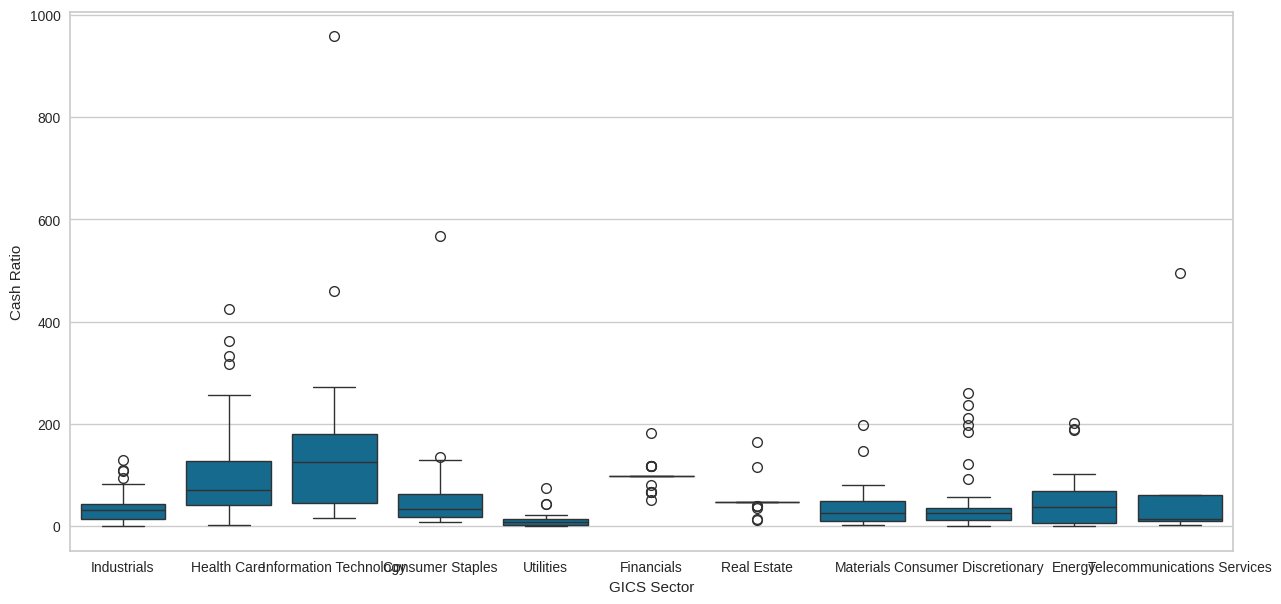

In [ ]:
#question 4
##compare GICS Sector and Cash Ratio
plt.figure(figsize=(15, 7))
sns.boxplot(x=data["GICS Sector"], y=data['Cash Ratio'])
plt.show()

**Response to Question 4:**
- How does average cash ration vary amongst economic sectors?
- The Financials Sector has the smallest variability, showing a good track record for covering short term obligations.
- The information technology sector has the largest median compared to all other sectors. This shows us that 50% of the Information Technology sector data has larger cash ratios than any other sector.
- Telecommunications Services and Utilities are the two sectors with the lowest medians for Cash Ratio. 100% of the Utilities Sector has lower Cash Ratio values than 50% of almost all other sectors.

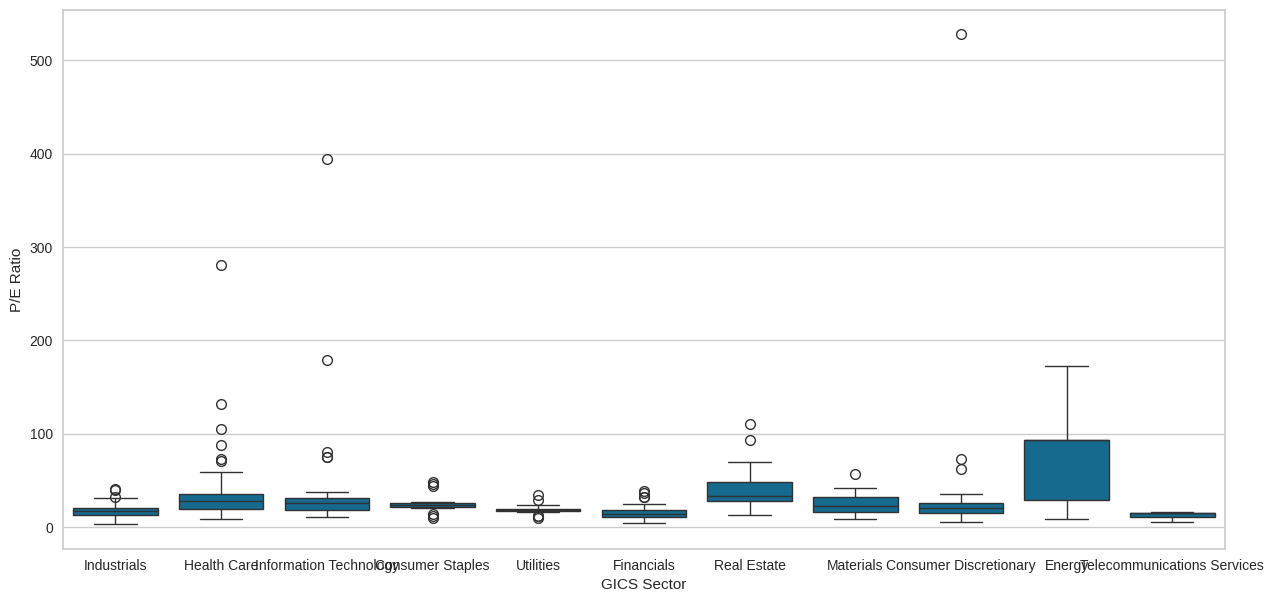

In [ ]:
#question 5
#compare P/E and GICS Sectors
#compare GICS Sector and Price Change
plt.figure(figsize=(15, 7))
sns.boxplot(x=data["GICS Sector"], y=data['P/E Ratio'])
plt.show()

**Response to Question 5:**
- The P/E Ratio amongst the different sectors are comparable. The sector with the highest variety of P/E Ratios, and largest median, is the Energy Sector. This means Energy has higher investments for a single share than other sectors.
- The sector with approximately lowest P/E Ratio is Telecommunications Services.

## Data Preprocessing

- ~Duplicate value check~ (completed in data overview)
- ~Missing value treatment~ (completed in data overview)
- Outlier check: As seen in the Data Overview and EDA sections, the outliers present in the data are permissable values. Large values for attributes like Net Worth are to be expected. In the same vien, negative values are to be expected for attributes like P/B Ratio since it reflects the ever-changing market.
- **Feature engineering: the data will need to be scaled to prepare for the clustering processes.**
- ~Any other preprocessing steps: will drop columns 'Ticker Symbol' and 'Security' (aka Company) because all entires are unique values.~

In [ ]:
#copy data
df = data.copy()
df.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

In [ ]:
#scale data
scaler = StandardScaler()
subset = df[num_cols].copy()
subset_scaled = scaler.fit_transform(subset)

In [ ]:
#create scaled dataframe
subset_scaled_frame = pd.DataFrame(subset_scaled, columns=subset.columns)
subset_scaled_frame.head()

Current Price  Price Change  Volatility       ROE  Cash Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   

   Net Cash Flow  Net Income  Earnings Per Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0                      0.107863  -0.652487  -0.506653  
1                      1.250274  -0.311769  -0.504205  
2                      1.098021  -0.391502   0.094941  
3                     -0.091622   0.947148   0.424333  
4                      1.978399   3.293307   0.199196

## EDA

- It is a good idea to explore the data once again after manipulating it.

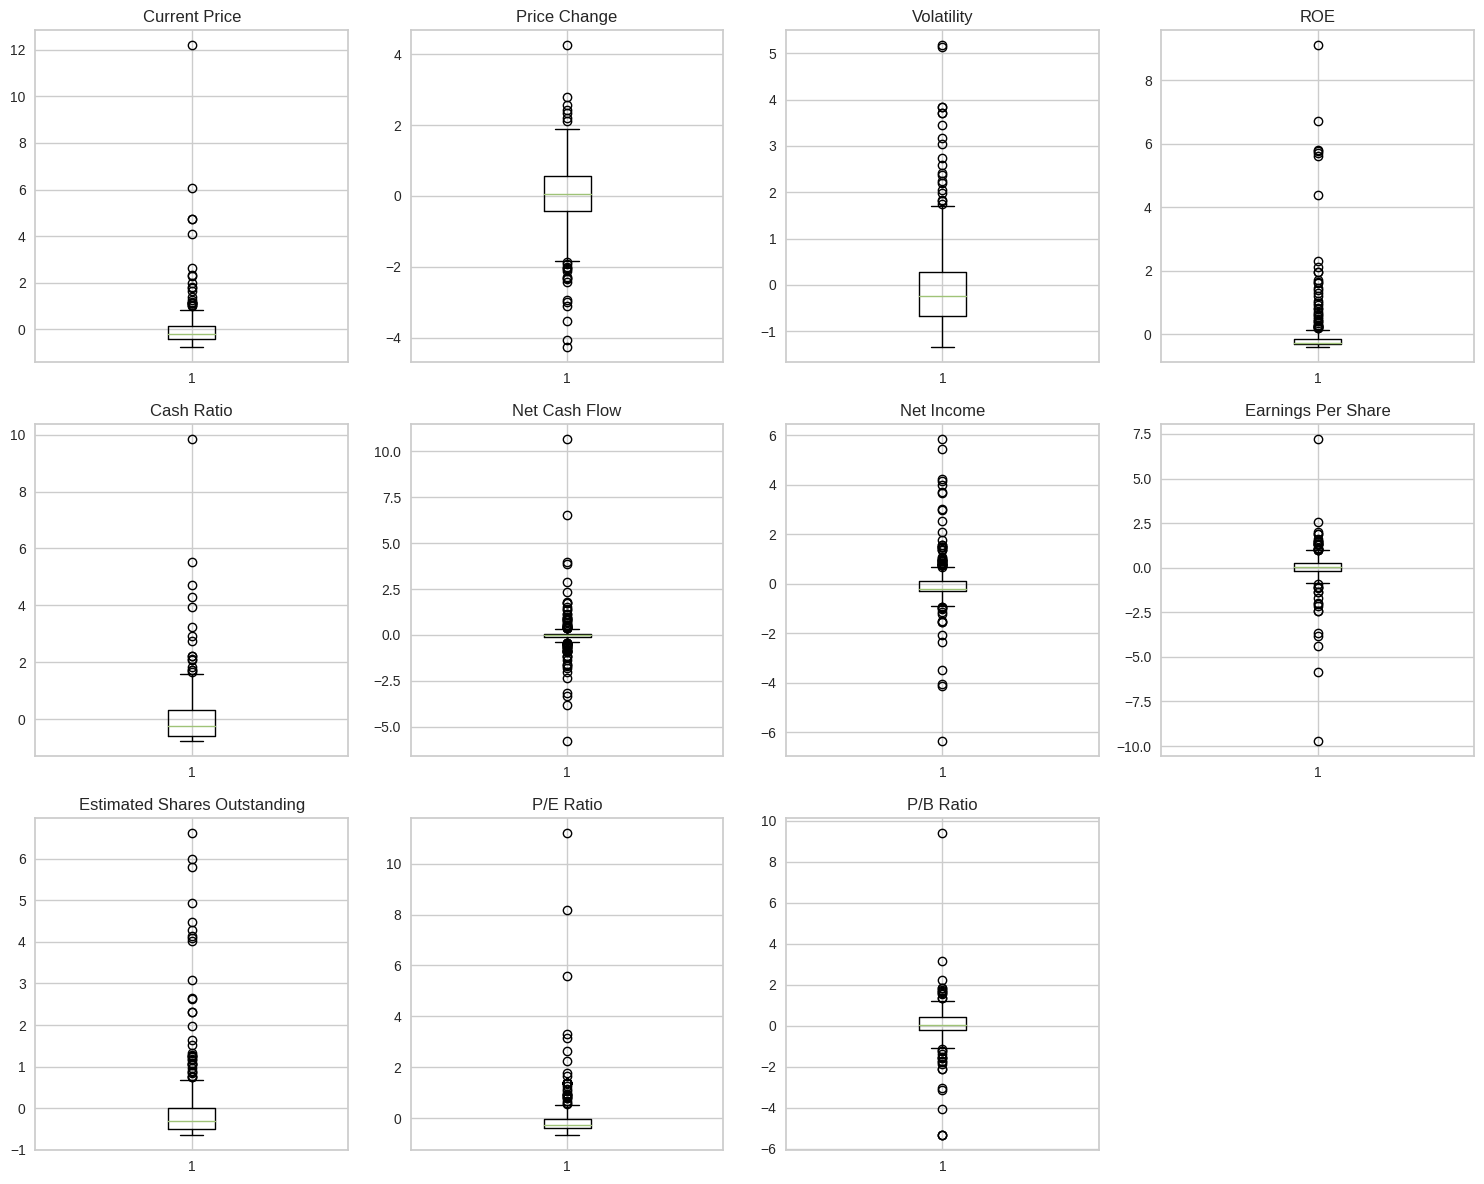

In [ ]:
plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(subset_scaled_frame[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## K-means Clustering

### Elbow Visualization

In [ ]:
km_df  = subset_scaled_frame.copy()

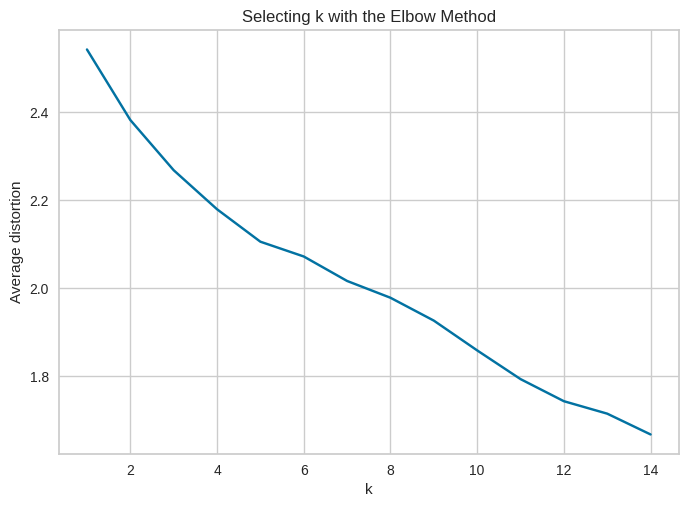

In [ ]:
#investigate clusters and elbow plot
#set range based on number of columns
clusters=range(1,15)
meanDistortions=[]

for k in clusters:
  model = KMeans(n_clusters=k)
  model.fit(km_df)
  prediction = model.predict(km_df)
  distortion = (
        sum(np.min(cdist(subset_scaled_frame, model.cluster_centers_, "euclidean"), axis=1))
        / subset_scaled_frame.shape[0]
    )

  meanDistortions.append(distortion)

#plot elbow
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

There seem to be elbows at k=5 and k=13. We can continue by using the KElbowVisualizer.

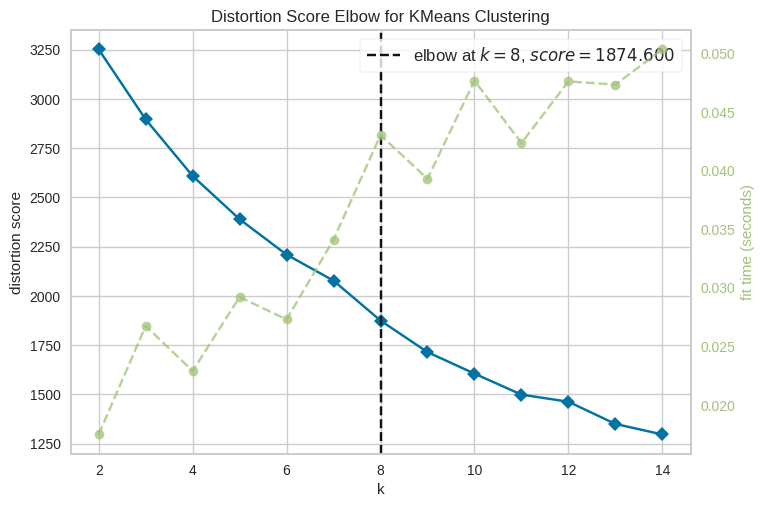

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), timings=True)
visualizer.fit(km_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

###Silhouette Scores

For n_clusters = 2, silhouette score is 0.43969639509980457
For n_clusters = 3, silhouette score is 0.4644405674779404
For n_clusters = 4, silhouette score is 0.45434371948348606
For n_clusters = 5, silhouette score is 0.43169988466492354
For n_clusters = 6, silhouette score is 0.36698524210914063
For n_clusters = 7, silhouette score is 0.10587349598463779
For n_clusters = 8, silhouette score is 0.40021596082234684
For n_clusters = 9, silhouette score is 0.4051539505522535
For n_clusters = 10, silhouette score is 0.1147132918355368
For n_clusters = 11, silhouette score is 0.16268826704862685
For n_clusters = 12, silhouette score is 0.12883008320005324
For n_clusters = 13, silhouette score is 0.1744804713048242
For n_clusters = 14, silhouette score is 0.17457839075773943


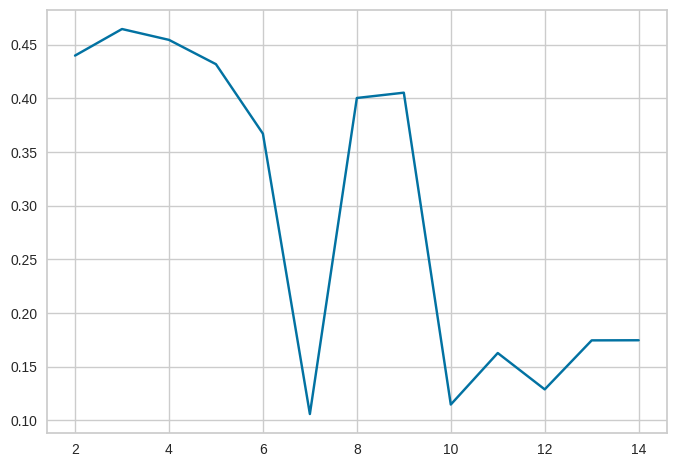

In [ ]:
#gather scores
#plot to compare
sil_score = []
cluster_list = list(range(2, 15))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((km_df))
    score = silhouette_score(km_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

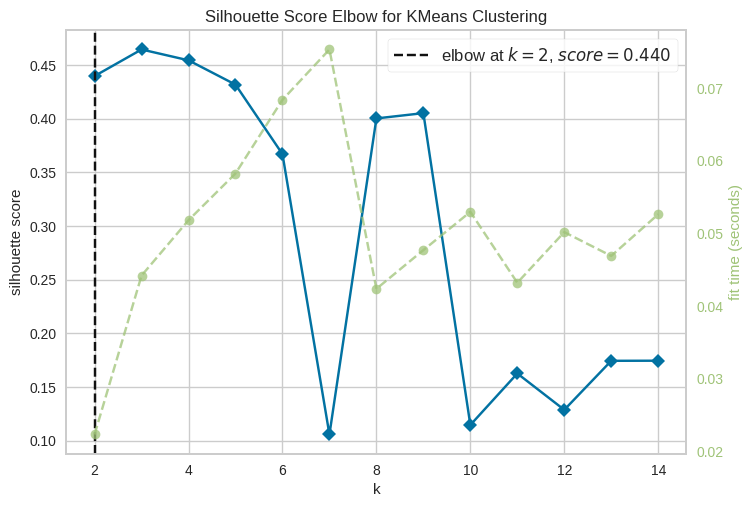

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
#plot elbow using new metric
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(km_df)
visualizer.show()

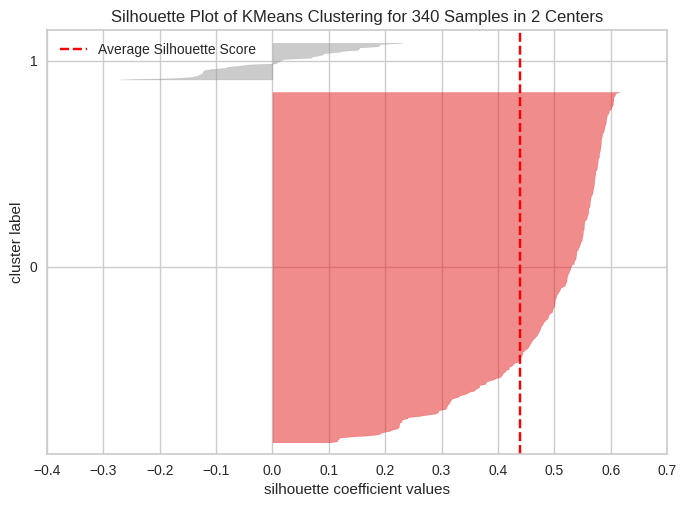

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# checking cluster=2 with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(km_df)
visualizer.show()

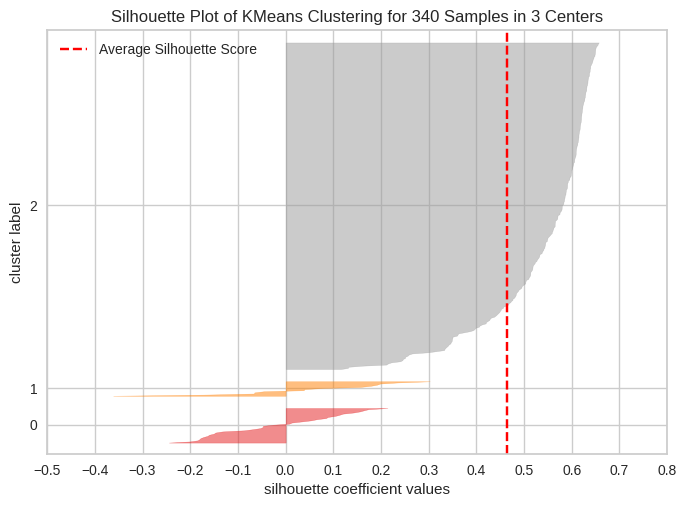

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# checking cluster=3 with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(km_df)
visualizer.show()

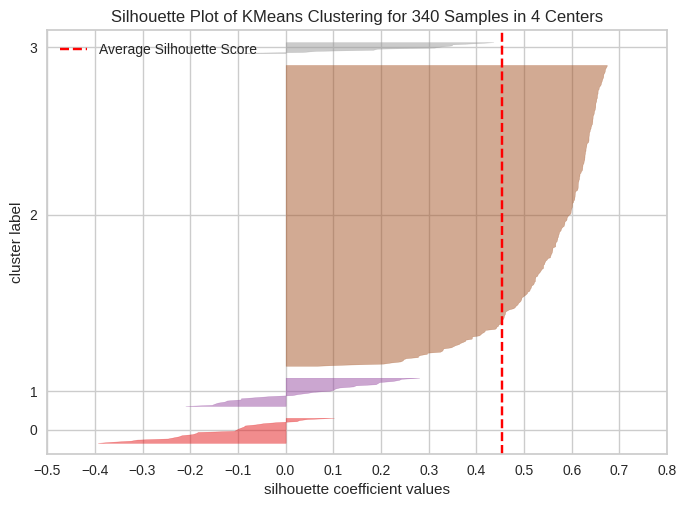

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# checking cluster=4 with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(km_df)
visualizer.show()

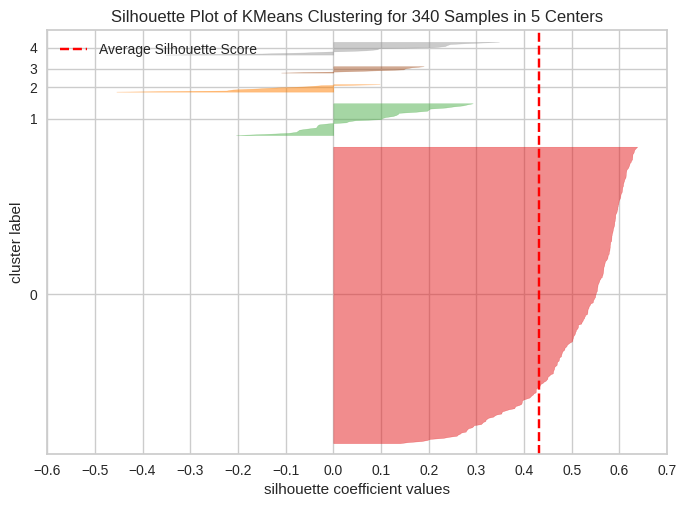

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# checking cluster=5 with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(km_df)
visualizer.show()

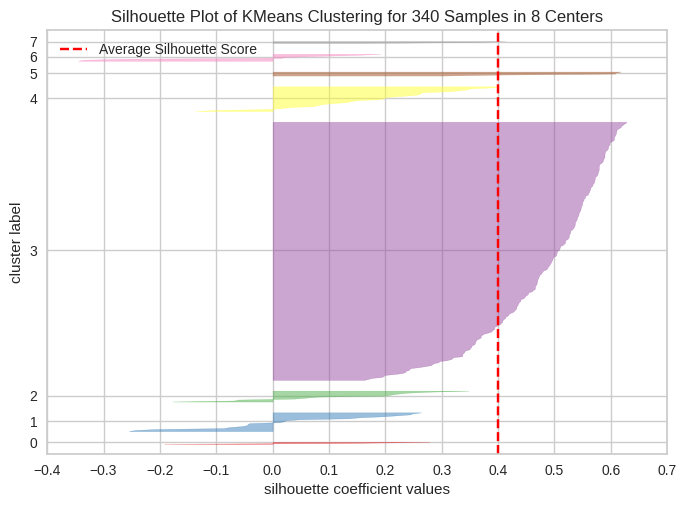

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# checking cluster=8 with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))
visualizer.fit(km_df)
visualizer.show()

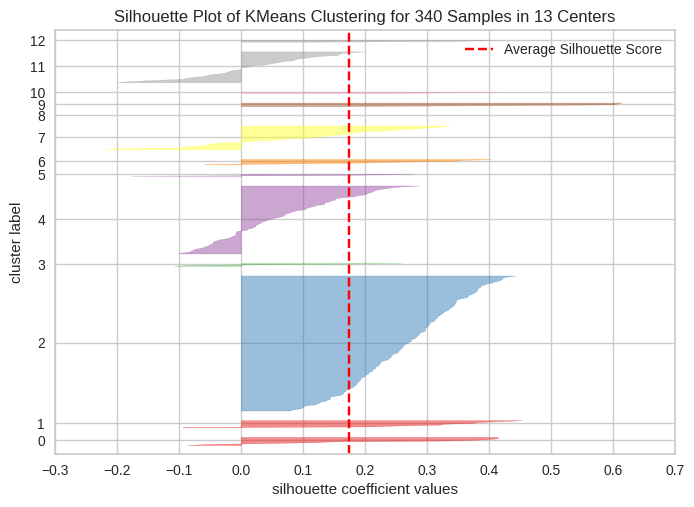

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 13 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# checking cluster=13 with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(13, random_state=1))
visualizer.fit(km_df)
visualizer.show()

### Final KMeans Model with Clusters=3
- This cluster value was selected because n_clusters=3 output the highest Silhouette score of 0.4644

In [ ]:
#state and fit model
kmean_model = KMeans(n_clusters=3, random_state=1)
kmean_model.fit(km_df)

KMeans(n_clusters=3, random_state=1)

In [ ]:
#copy original data
df_finalkm = df.copy()
#add the cluster labels to the original data
df_finalkm['Cluster Group'] = kmean_model.labels_

#add the cluster labels to the scaled data
subset_scaled_frame['Cluster Group'] = kmean_model.labels_

In [ ]:
#view original data
df_finalkm.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  Cluster Group  
0                  6.681299e+08    3.718174  -8.784219              2  
1                  1.633016e+09   18.806350  -8.750068              2  
2                  1.504422e+09   15.275510  -0.394171              2  
3                  4.996437e+08   74.555557   4.199651              2  
4                  2.247994e+09  178.451613   1.059810              0

###KMeans Cluster Profiles

In [ ]:
#group by cluster categories and get mean values of numeric data
cluster_profile = df_finalkm.groupby('Cluster Group').mean(numeric_only=True)

In [ ]:
#count members of each cluster
cluster_profile['Members Count']= (df_finalkm.groupby('Cluster Group')['Ticker Symbol'].count().values)

In [ ]:
#print companies in each cluster
for cl in df_finalkm["Cluster Group"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df_finalkm[df_finalkm["Cluster Group"] == cl]["Security"].unique())
    print()

In cluster 2, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Alliance Data Systems'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'AutoNation Inc' 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Cate

In [ ]:
#display the profile
cluster_profile.style.highlight_max(color='yellow', axis=0)

In [ ]:
#view sectors in clusters
df_finalkm.groupby(["Cluster Group", "GICS Sector"])['Security'].count()

Cluster Group  GICS Sector                
0              Consumer Discretionary          2
               Energy                         23
               Health Care                     1
               Industrials                     1
               Information Technology          4
               Materials                       1
1              Consumer Discretionary          1
               Consumer Staples                1
               Energy                          1
               Financials                      4
               Health Care                     3
               Information Technology          2
               Telecommunications Services     2
2              Consumer Discretionary         37
               Consumer Staples               18
               Energy                          6
               Financials                     45
               Health Care                    36
               Industrials                    52
               Information Technology         27
               Materials                      19
               Real Estate                    27
               Telecommunications Services     3
               Utilities                      24
Name: Security, dtype: int64

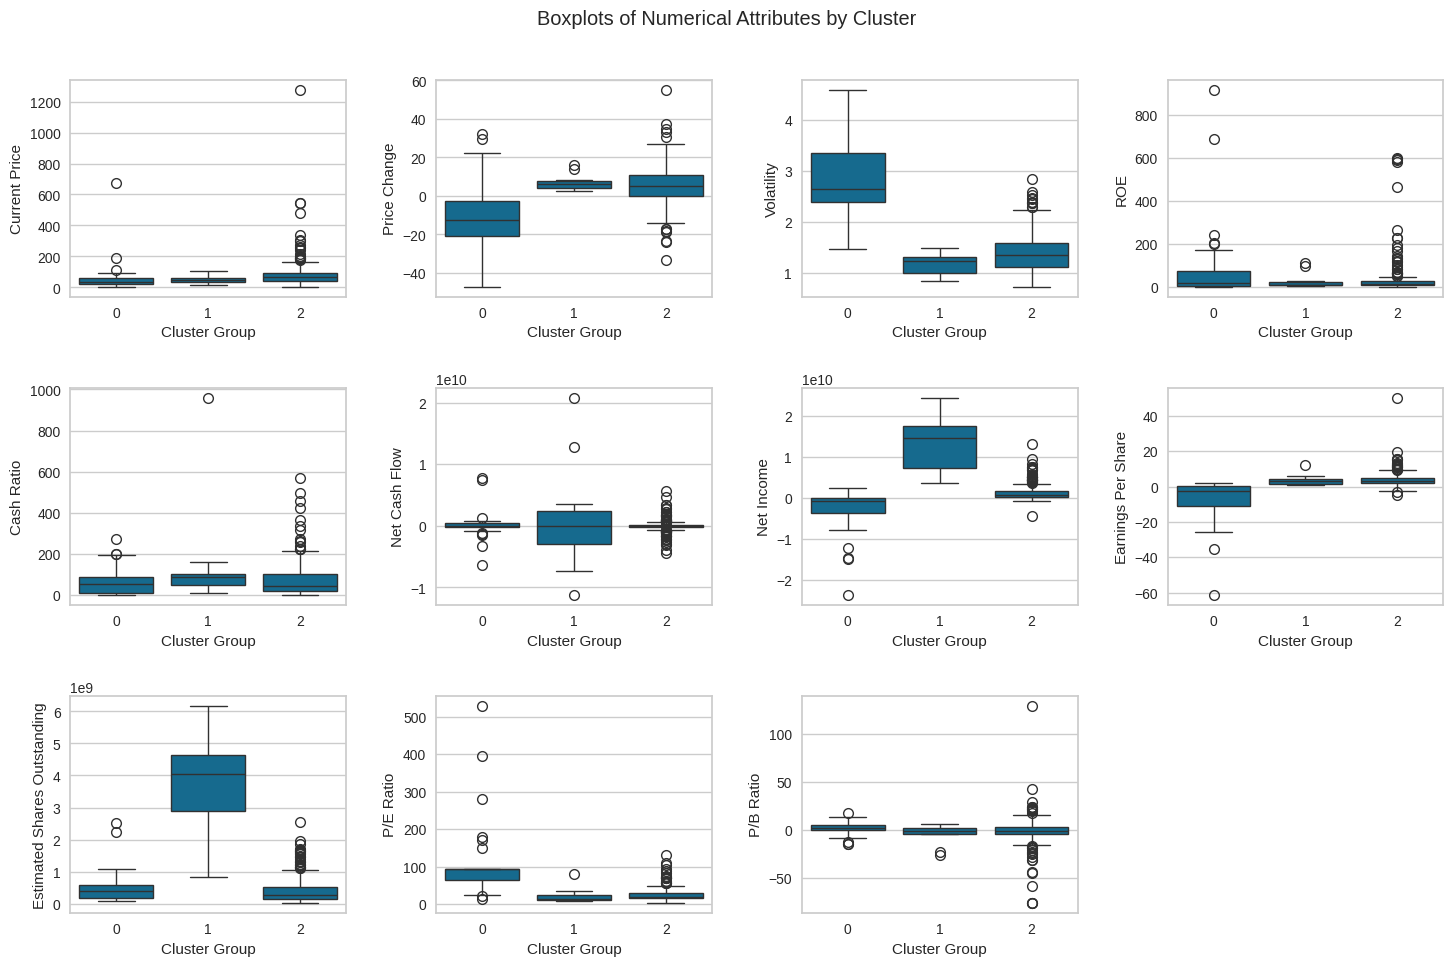

In [ ]:
#boxplots of numerical attributes
#separate by cluster
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplots of Numerical Attributes by Cluster")

for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df_finalkm, x="Cluster Group", y=variable)

plt.tight_layout(pad=2.0)

**Insights Regarding Cluster Characteristics:**
- Cluster 0: second largest cluster with 32 members. Data in this cluster...
 are majority from the energy sector. The data shows negative price changes, high votality, large ROE, and negative Net Income & Earnings Per Share.
- Cluster 1: samllest cluster with 14 points. Data in this cluster...lower averages of Current Price, stability in Price Change and low Volatility, higher Cash Ratios, less predictable Cash Flow, high Net Income, high variety of Estimated Shares Outstanding.
- Cluster 2: Holds majority of the data with 294 points. Data in this cluster...positive price changes, high variety in Volatility measures, positive Net Income, less predictability of P/B Ratios.

1. Current Price: similar for all three clusters. Cluster 1 has a lower measure of center, which shows that the median/average current price of this set of stocks is about $52.
2. Price Change: As seen from the boxplots, Cluster 1 has the smallest variability for this attribtue measure. This shows that Cluster 1 experiences the smallest price changes whereas Cluster 0 and CLuster 2 have a wider range for price changes. Notice that Cluster 0's price change boxplot shows 75% of the data below 0, so CLuster 0's data displays predominately negative price changes.
3. Volatility: with respect to the negative price changes shown for Cluster 0, its data also has much higher Volatility scores than Clusters 1 or 2. With such low variability in Price change, it tracks that Cluster 1 data has the lowest Volatility scores of all clusters.
4. ROE: Cluster 0 has larger ROE with a measure of center around 96.5. Clusters 1 and 2 have similar ROE centers of 26 and 34 respectfully.
5. Cash Ratio: Cluster 1 has highest Cash Ratio data with a measure of center at 140, whereas clusters 0 and 2's cash ratio data are similar with measures of 70 and 66 respectfully.
6. Net Cash Flow: Cluster 1 has the highest variety of cash flow. Clusters 0 and 2 have many outliers.
7. Net Income: Cluster 0 contains 75% of data with negative net income. It has a negative measure of center, while Clusters 1 and 2 have majority postive Net Income data. On average, Cluster 1 has the highest net income of all clusters.
8. Earnings Per Share: as trending with Net Income, Cluster 0 also has majority of data with negative values for earnings per share. Cluster 1 and 2's earnings per share data are comparable-- Cluster 2 contains more outliers of both positive and negative values.
9. Estimated Shares Outstanding: Cluster 1 has the most variability in Est. Shares Outstanding, as well as the largest measure of center. Clusters 0 and 2 both have outliers present in the data and similar measures of center.
10. P/E Ratio: All clusters contain outliers. Cluster 0 contains data with higher P/E Ratios whereas Clusters 1 and 2 are comparable.
11. P/B Ratio: all clusters have outliers present, but Cluster 2 has the most in both positive and negative directions. Cluster 1 is the only cluster to have a positive measure of center for P/B Ratio.


## Hierarchical Clustering

In [ ]:
#copy the scaled data
harchy_df  = subset_scaled_frame.copy()

###Checking Cophenetic Correlation

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(harchy_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(harchy_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9258232807603518.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8702339998778295.
Cophenetic correlation for Euclidean distance and average linkage is 0.9429573458495599.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8659146797006966.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9095824236261919.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8171563833185052.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9324662171370572.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9103186591079586.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9256950378508784.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.8273180174929547.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9352147105001555.
Cophenetic co

In [ ]:
# print distance metric combined with linkage method that output the highest CC
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9429573458495599, which is obtained with Euclidean distance and average linkage.


###Dendrograms

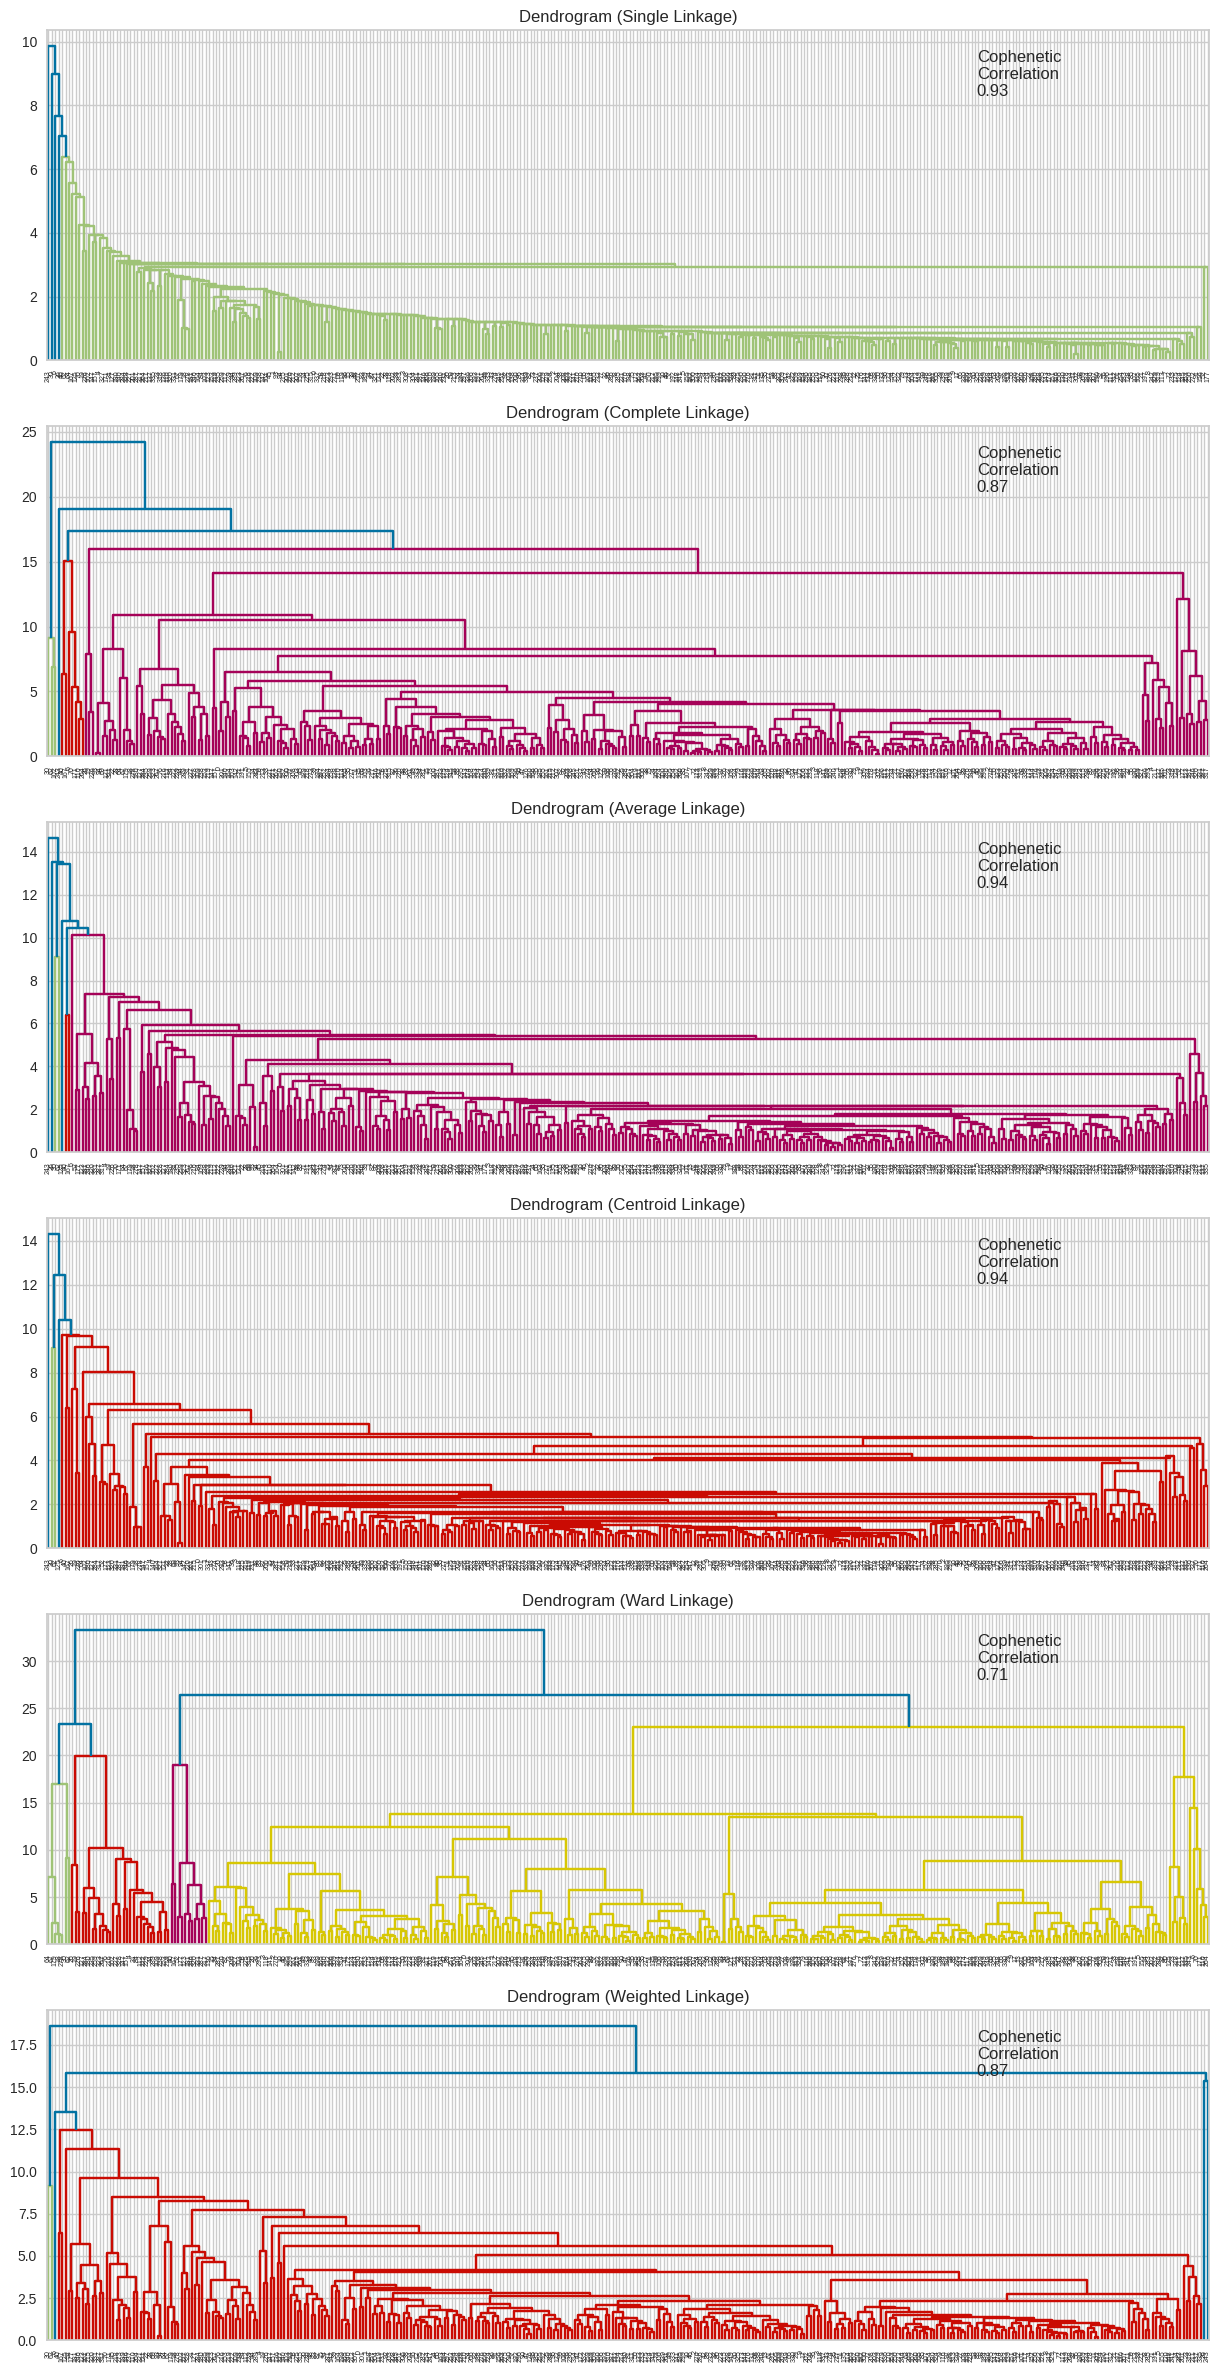

In [ ]:
#Check linkage Dendrograms for Euclidean Distance
#highest CC score was with Euclidean and average link

# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

#enumerate through the list of linkage methods
# For each linkage method, plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(harchy_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(harchy_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

### Hierarchical Model

In [ ]:
#euclidean average hierarchy model
HCmodel = AgglomerativeClustering(n_clusters=6, metric="euclidean", linkage="average")
HCmodel.fit(harchy_df)

AgglomerativeClustering(linkage='average', metric='euclidean', n_clusters=6)

In [ ]:
#copy original data
df_euclidean_harchy = df.copy()
#add the cluster labels to the original data
df_euclidean_harchy['E Cluster Group'] = HCmodel.labels_

In [ ]:
#add the cluster labels to the scaled data
subset_scaled_frame['E Cluster Group'] = HCmodel.labels_

###Cluster Profiles

In [ ]:
#group by cluster categories and get mean values of numeric data
HCcluster_profile = df_euclidean_harchy.groupby('E Cluster Group').mean(numeric_only=True)

In [ ]:
HCcluster_profile["Member Count"] = (
    df_euclidean_harchy.groupby("E Cluster Group")["Ticker Symbol"].count().values)

In [ ]:
HCcluster_profile.style.highlight_max(color="yellow", axis=0)

In [ ]:
#print companies in each cluster
for cl in df_euclidean_harchy["E Cluster Group"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df_finalkm[df_euclidean_harchy["E Cluster Group"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Alexion Pharmaceuticals'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'AutoNation Inc' 'Anthem Inc.' 'Aon plc' 'Anadarko Petroleum Corp'
 'Amphenol Corp' 'Arconic Inc' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'

In [ ]:
df_euclidean_harchy.groupby(["E Cluster Group", "GICS Sector"])['Security'].count()

E Cluster Group  GICS Sector                
0                Consumer Discretionary         38
                 Consumer Staples               19
                 Energy                         28
                 Financials                     48
                 Health Care                    40
                 Industrials                    53
                 Information Technology         31
                 Materials                      20
                 Real Estate                    27
                 Telecommunications Services     5
                 Utilities                      24
1                Energy                          2
2                Financials                      1
                 Information Technology          1
3                Consumer Discretionary          1
4                Information Technology          1
5                Consumer Discretionary          1
Name: Security, dtype: int64

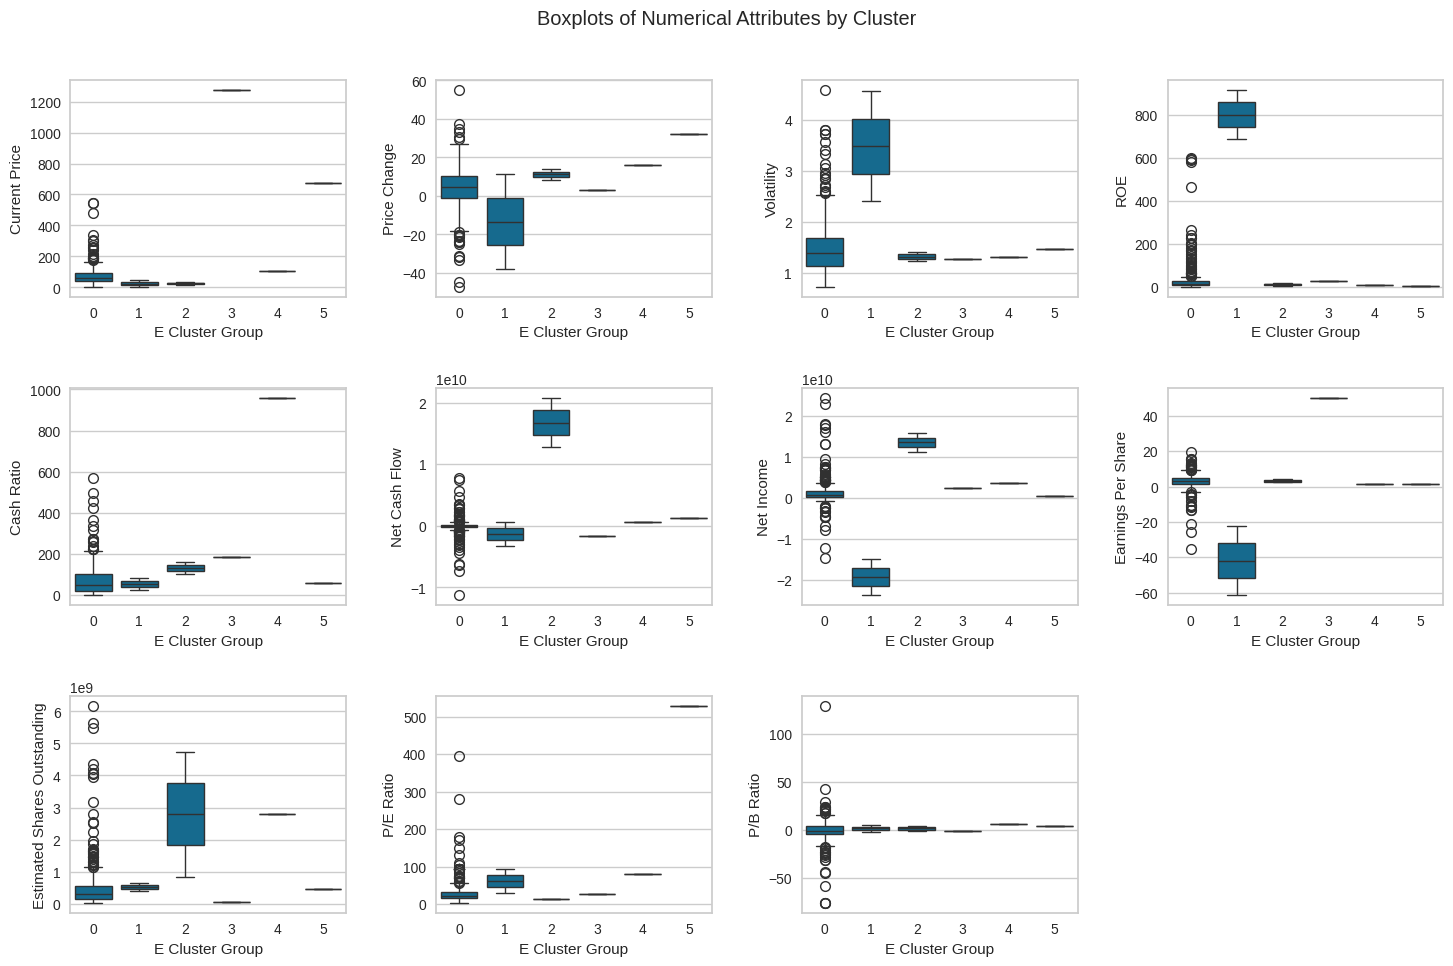

In [ ]:
#boxplots of numerical attributes
#separate by cluster
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplots of Numerical Attributes by Cluster")

for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df_euclidean_harchy, x="E Cluster Group", y=variable)

plt.tight_layout(pad=2.0)

- Cluster 0 is the largest, with 333 members. Due to its large size, the boxplots for the numerical attributes of this cluster have high variability and many outliers..
- Cluster 1 has 2 members (Apache Corporation & Chesapeake Energy). Both members of this cluster are from the Energy Sector. These companies have the highest average Volatility and ROE. They also have negative average Price Change and the lowest current price value.
- Cluster 2 has 2 members (Bank of America Corp & Intel Corp). The cluster's members are from the Financial and Information Technology Sectors. These companies have the highest average Net Cash Flow and Net Income.
- Cluster 3 has 1 member (Priceline.com INC). The cluster's member is in the Consumer Discreationary Sector. This company has the highest Current Price on the market, as well as highest average earnings per share.
- Cluster 4 has 1 member (Facebook). The cluster's member is in the Information Technology Sector. Tis company has the the highest average cash ratio, Estimated Shares Outstanding, and P/B Ratio.
- Cluster 5 has 1 member (Amazon.com). The cluster's member is in the Consumer Discreationary Sector. The company have the highest average Price Change and P/E Ratio.

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.
______________________________________________________________________________
1. Both clustering techniques took approximately the same amount of time. The dendrograms for the Hierarchy Clustering method required more precise examination to make informed decision on cluster values.
2. The K-Means clustering provided more disparate cluster groups (3 clusters) whereas the Hierarchy method included clusters with as little as one member (6 clusters). The K-Means model proves to be of better use for the data segmentation as it created clusters that were not overly specific for one company's stock data.
3. Cluster 2 in K-Means and Cluster 0 in Hierarchy are similar in size: 294 and 333 members each. While the trends in these clusters' stock data are similar, the measures of center and variability in K-Means Cluster 2 are more easily understood and applied to real-life scenarios because it is not as heavily impacted on outlier members. Additionally, the other Clusters 0 & 1 in K-Means Model display helpful differences to make stock decisions. Example: Cluster 0 displays data with patterns of negative price changes and high volatility and Cluster 1 data shows the opposite. This helps stakeholders have a broad idea of a company's characteristics before a deep dive.

## Actionable Insights and Recommendations

- Cluster 0 in K-Means Model is the least attractive stock data due to their negative net incomes and earnings per share, and high volatility.
- Cluster 1 in K-Means Model features very attractive investment opportunities due to their high averages for Price Change, Cash Ratio, Net Cash Flow, Net Income, and Estimated Shares Outstanding. An investor could use this cluster in a low-risk investment portfolio with a bit of variety.
- Cluster 2 in K-Means Model features more diverse investment opportunities. There is more risk in this cluster due to lower averages in comparison to Cluster 1, but if an investor is interested in a diverse portfolio with high current price averages and earnings per share, the companies features here are worth pursuit.